In [14]:
#Bagging (Bootstrap Aggregating) – End-to-End Notebook
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

In [15]:
# Create classification data
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Convert to DataFrame (for clarity)
X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
y = pd.Series(y, name="target")

X.head(), y.head()


(   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
 0  -1.030931   1.391626   0.547274   0.928932  -1.738880   1.250002   
 1  -2.766254   1.247870  -0.303691   1.083145   0.710836   1.968202   
 2  -0.558987   0.299849   1.527071   0.360442  -1.360209   1.100793   
 3  -1.350289  -2.046078  -0.614264   0.126459  -0.783923   5.895026   
 4  -0.275754  -0.728495   0.027727  -0.660834  -1.928161   3.544945   
 
    feature_6  feature_7  feature_8  feature_9  
 0   1.332551   1.578256   2.124722  -0.318434  
 1  -1.794192   2.346422   1.700778  -0.001190  
 2  -0.755951   1.331933   2.041105  -0.824404  
 3  -0.915477  -3.184768  -0.399260  -3.920960  
 4   1.446944  -1.111662   0.313766  -2.376528  ,
 0    0
 1    1
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.825


In [18]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,          # number of trees
    max_samples=0.8,           # bootstrap samples
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging_model.fit(X_train, y_train)


,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [19]:
y_pred_bag = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bag))


Bagging Accuracy: 0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       100
           1       0.87      0.89      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [20]:
print("Decision Tree Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Bagging Classifier Accuracy :", accuracy_score(y_test, y_pred_bag))


Decision Tree Accuracy : 0.825
Bagging Classifier Accuracy : 0.88


In [21]:
len(bagging_model.estimators_)


100

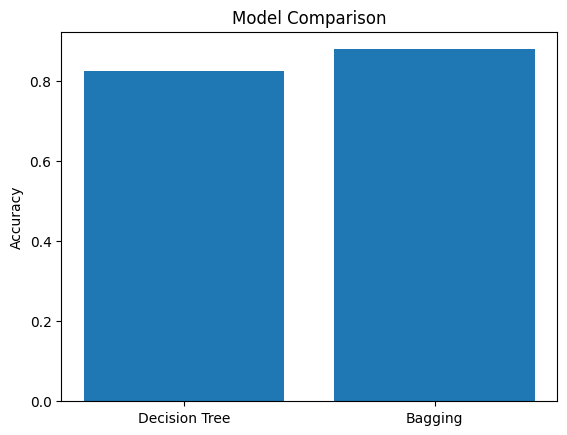

In [22]:
models = ['Decision Tree', 'Bagging']
scores = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_bag)
]

plt.bar(models, scores)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
